In [128]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from models import ols_regression, manhattan_linear, gc

2024-09-19 15:23:10.442486: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-19 15:23:10.444896: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-19 15:23:10.451963: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-19 15:23:10.468700: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-19 15:23:10.468737: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 15:23:10.480755: I tensorflow/core/platform/cpu_feature_guard.cc:

In [2]:
def min_max_scaling(X,min_val,max_val):
    X = np.array(X)
    X_min = np.min(X)
    X_max = np.max(X)
    
    # If the column has constant values (min == max), return the original values unscaled
    if X_min == X_max:
        return X
    
    # Perform scaling if min != max
    X_scaled = (X - X_min) / (X_max - X_min) * (max_val - min_val) + min_val

    
    return X_scaled

In [3]:
nr_people_pop1 = 100
nr_people_pop2 = 50
nr_people_pop3 = 300
total_humans = nr_people_pop1+ nr_people_pop2+nr_people_pop3
minaf_pop1 = 0.2
minaf_pop2 = 0.5
minaf_pop3 = 0.5

majaf_pop1 = 0.4
majaf_pop2 = 0.2
majaf_pop3 = 0.1

hetaf_pop1 = 1 - minaf_pop1 - majaf_pop1
hetaf_pop2 = 1 - minaf_pop2 - majaf_pop2
hetaf_pop3 = 1 - minaf_pop3 - majaf_pop3

pheno_pop1 = 0.3
pheno_pop2 = 0.7
pheno_pop3 = 1

In [4]:
# make snp
pop1_snps = [-1]*int(nr_people_pop1*minaf_pop1) + [0]*int(nr_people_pop1*hetaf_pop1) + [1]*int(nr_people_pop1*majaf_pop1)
nr_pop1_snps = [int(nr_people_pop1*minaf_pop1)]*int(nr_people_pop1*minaf_pop1) + [int(nr_people_pop1*hetaf_pop1)]*int(nr_people_pop1*hetaf_pop1) + [int(nr_people_pop1*majaf_pop1)]*int(nr_people_pop1*majaf_pop1)
pop2_snps = [-1]*int(nr_people_pop2*minaf_pop2) + [0]*int(nr_people_pop2*hetaf_pop2) + [1]*int(nr_people_pop2*majaf_pop2)
nr_pop2_snps = [int(nr_people_pop2*minaf_pop2)]*int(nr_people_pop2*minaf_pop2) + [int(nr_people_pop2*hetaf_pop2)]*int(nr_people_pop2*hetaf_pop2) + [int(nr_people_pop2*majaf_pop2)]*int(nr_people_pop2*majaf_pop2)
pop3_snps = [-1]*int(nr_people_pop3*minaf_pop3) + [0]*int(nr_people_pop3*hetaf_pop3) + [1]*int(nr_people_pop3*majaf_pop3)
nr_pop3_snps = [int(nr_people_pop3*minaf_pop3)]*int(nr_people_pop3*minaf_pop3) + [int(nr_people_pop3*hetaf_pop3)]*int(nr_people_pop3*hetaf_pop3) + [int(nr_people_pop3*majaf_pop3)]*int(nr_people_pop3*majaf_pop3)

snps = pop1_snps + pop2_snps + pop3_snps
snps_nr = nr_pop1_snps + nr_pop2_snps + nr_pop3_snps


In [5]:
minaf = [minaf_pop1]*nr_people_pop1 + [minaf_pop2]*nr_people_pop2 + [minaf_pop3]*nr_people_pop3
hetaf = [hetaf_pop1]*nr_people_pop1 + [hetaf_pop2]*nr_people_pop2 + [hetaf_pop3]*nr_people_pop3
majaf = [majaf_pop1]*nr_people_pop1 + [majaf_pop2]*nr_people_pop2 + [majaf_pop3]*nr_people_pop3

In [6]:
pop = ['pop1']*nr_people_pop1 + ['pop2']*nr_people_pop2 +  ['pop3']*nr_people_pop3
pop_nr = [nr_people_pop1]*nr_people_pop1 + [nr_people_pop2]*nr_people_pop2 +  [nr_people_pop3]*nr_people_pop3
risk = [pheno_pop1]*nr_people_pop1 + [pheno_pop2]*nr_people_pop2 +  [pheno_pop3]*nr_people_pop3

In [7]:
humans = pd.DataFrame()
humans['snp'] = snps
humans['snp_nr'] = snps_nr
humans['snp_nr'] = humans['snp_nr']/humans['snp_nr'].max()

humans['minaf'] = minaf
humans['hetaf'] = hetaf
humans['majaf'] = majaf
humans['pop'] = pop
humans['pop_quantity'] = pop_nr
humans['risk'] = risk
#humans['risk'] = min_max_scaling(humans['risk'],-1,1)
#humans['risk'] = (humans['risk'] - humans['risk'].mean()) / humans['risk'].std()

In [8]:
pheno_pop1 = humans[humans['pop']=='pop1']['risk'].mean()
pheno_pop2 = humans[humans['pop']=='pop2']['risk'].mean()
pheno_pop3 = humans[humans['pop']=='pop3']['risk'].mean()

In [9]:
count_total_AFs = humans[['snp']].apply(pd.Series.value_counts)/len(humans)
total_minor = count_total_AFs.loc[-1].snp
total_het = count_total_AFs.loc[0].snp
total_major = count_total_AFs.loc[1].snp

In [10]:
total_major

0.17777777777777778

In [11]:
"""
humans = humans[humans['snp'] != 0]
count_total_AFs = humans[['snp']].apply(pd.Series.value_counts)/len(humans)
total_minor = count_total_AFs.loc[-1].snp
total_major = count_total_AFs.loc[1].snp
humans
"""

"\nhumans = humans[humans['snp'] != 0]\ncount_total_AFs = humans[['snp']].apply(pd.Series.value_counts)/len(humans)\ntotal_minor = count_total_AFs.loc[-1].snp\ntotal_major = count_total_AFs.loc[1].snp\nhumans\n"

In [12]:
X = humans[['snp']]  # Predictor variable
y = humans['risk']    # Response variable

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp']
intercept = model.params['const']
p_value = model.pvalues['snp']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_risk'] = model.predict(X)

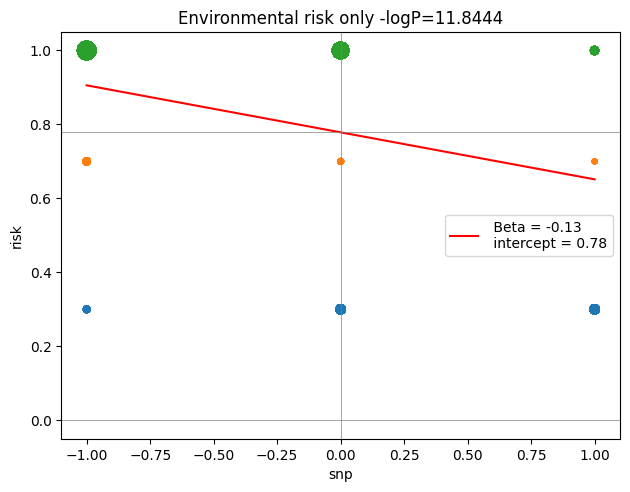

In [13]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp', y='risk', data=humans, size='snp_nr', hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp'], humans['predicted_risk'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

In [14]:
# manually by matrix computation

In [15]:
def manual_ols(X,y):
    X = np.array(X)
    X = np.column_stack([np.ones(len(X)), X])
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    # Compute beta_matrix using the formula (X.T @ X)^(-1) @ X.T @ y
    XTX = X.T @ X
    try:
        XTX_inv = np.linalg.inv(XTX)
    except np.linalg.LinAlgError:
        raise ValueError("Matrix X.T @ X is singular and cannot be inverted.")
    
    beta_matrix = XTX_inv @ X.T @ y
    
    return beta_matrix

In [16]:
X = humans['snp']
y = humans['risk']

In [17]:
beta_matrix = manual_ols(X, y)
try:
    [intercept_manual, beta_manual] = beta_matrix
    print("intercept")
    print(np.round(intercept_manual,2))
    print("slope")
    print(np.round(beta_manual,2))
except:
    print("only slope")
    print(np.round(beta_matrix[0]))

intercept
0.78
slope
-0.13


In [18]:
# manually by counting like this:
# Sample data points (replace with your actual data)

x = np.array(humans['snp'])
y = np.array(humans['risk'])

# Add a column of ones for the intercept
x2 = np.ones(len(x))

# Number of data points
n = len(x)

# Calculating the required sums with intercept handling
sum_x = np.sum(x)
sum_x2 = np.sum(x2)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x2y = np.sum(x2 * y)
sum_x2_x = np.sum(x * x2)  # This is equivalent to sum_x since x2 is just ones
sum_xx = np.sum(x ** 2)

# Calculating slope (m) and intercept (b) manually using the normal equations derived from sums
denominator = n * sum_xx - sum_x ** 2  # Common denominator

# Slope (m) and intercept (b)
m = (n * sum_xy - sum_x * sum_y) / denominator
b = (sum_y * sum_xx - sum_x * sum_xy) / denominator

# Output the slope and intercept
print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")

# Predicting y values using the model with the intercept
y_pred = m * x + b


Slope (m): -0.12712056095905905
Intercept (b): 0.7786247455326849


In [314]:
# manually counting using MAFs

In [20]:
sum_x = (majaf_pop1 - minaf_pop1)*nr_people_pop1 + (majaf_pop2 - minaf_pop2)*nr_people_pop2 + (majaf_pop3 - minaf_pop3)*nr_people_pop3
sum_x

-115.0

In [21]:
sum_y = humans['risk'].sum()
sum_y

365.0

In [22]:
sum_xy = (majaf_pop1 - minaf_pop1)*nr_people_pop1*pheno_pop1 + (majaf_pop2 - minaf_pop2)*nr_people_pop2*pheno_pop2 + (majaf_pop3 - minaf_pop3)*nr_people_pop3*pheno_pop3
sum_xy

-124.5

In [23]:
sum_x2 = (majaf_pop1 + minaf_pop1)*nr_people_pop1 + (majaf_pop2 + minaf_pop2)*nr_people_pop2 + (majaf_pop3 + minaf_pop3)*nr_people_pop3
sum_x2

275.0

In [24]:
n = len(humans)

In [25]:
# Calculating slope (m) and intercept (b)
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
b = (sum_y * sum_x2 - sum_x * sum_xy) / (n * sum_x2 - sum_x ** 2)

# Output the slope and intercept
print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")

Slope (m): -0.12712056095905905
Intercept (b): 0.7786247455326849


In [26]:
# Simplifying

In [27]:
sum_x = humans['majaf']-humans['minaf']
sum_x = sum_x.sum()
sum_x

-115.0

In [28]:
sum_y = humans['risk']
sum_y = sum_y.sum()
sum_y

365.0

In [29]:
sum_xy = (humans['majaf']-humans['minaf'])*humans['risk']
sum_xy = sum_xy.sum()
sum_xy

-124.5

In [30]:
sum_x2 = humans['majaf']+humans['minaf']
sum_x2 = sum_x2.sum()
sum_x2

274.99999999999994

In [31]:
# Calculating slope (m) and intercept (b)
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
b = (sum_y * sum_x2 - sum_x * sum_xy) / (n * sum_x2 - sum_x ** 2)

# Output the slope and intercept
print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")

Slope (m): -0.12712056095905908
Intercept (b): 0.778624745532685


In [32]:
# the hard part

In [33]:
A = humans['majaf']
B = humans['minaf']

In [34]:
x = np.array((n*(A+B) - (A-B)@(A-B) + (A-B))/(n*(A-B)))

In [35]:
# Add a column of ones for the intercept
x2 = np.ones(len(x))

# Number of data points
n = len(x)

# Calculating the required sums with intercept handling
sum_x = np.sum(x)
sum_x2 = np.sum(x2)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x2y = np.sum(x2 * y)
sum_x2_x = np.sum(x * x2)  # This is equivalent to sum_x since x2 is just ones
sum_xx = np.sum(x ** 2)

# Calculating slope (m) and intercept (b) manually using the normal equations derived from sums
denominator = n * sum_xx - sum_x ** 2  # Common denominator

# Slope (m) and intercept (b)
m = (n * sum_xy - sum_x * sum_y) / denominator
b = (sum_y * sum_xx - sum_x * sum_xy) / denominator

# Output the slope and intercept
print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")

# Predicting y values using the model with the intercept
y_pred = m * x + b

Slope (m): -0.1668086939517699
Intercept (b): 0.7320245694231137


In [72]:
X = humans['snp']
y = humans['risk']

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp']
intercept = model.params['const']
p_value = model.pvalues['snp']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_risk'] = model.predict(X)

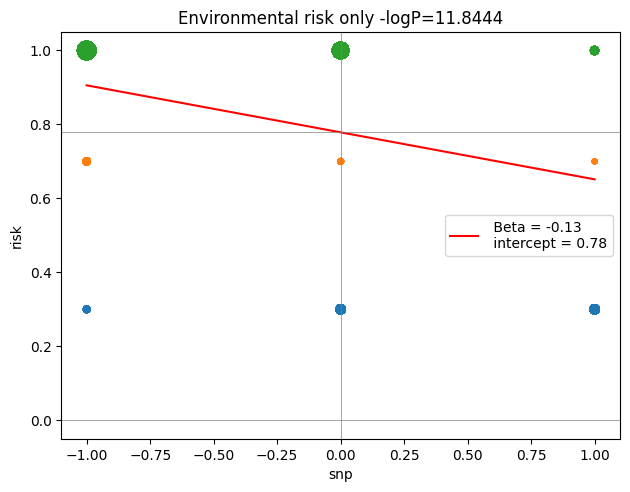

In [73]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp', y='risk', data=humans, size='snp_nr', hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp'], humans['predicted_risk'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

In [74]:
humans['correction'] = humans.apply(lambda row: row['minaf'] if row['snp'] == -1 else (row['hetaf'] if row['snp'] == 0 else row['majaf']), axis=1)
humans['correction'] = humans['correction']*humans['snp']
humans['correction'] = min_max_scaling(humans['correction'],-1,1)
X = humans['correction']
y = humans['risk']

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['correction']
intercept = model.params['const']
p_value = model.pvalues['correction']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_risk_correction'] = model.predict(X)

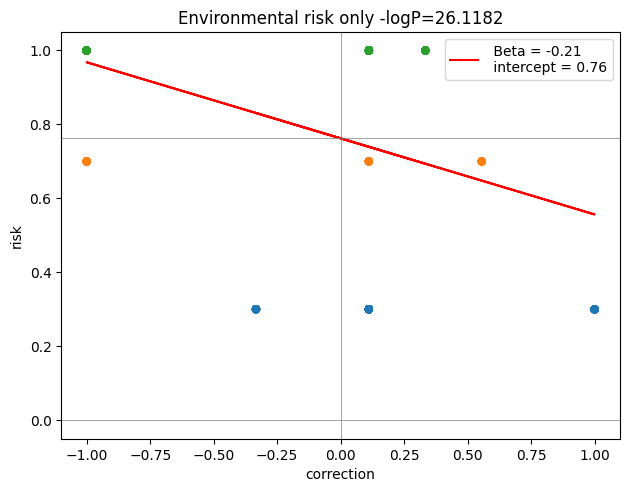

In [75]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='correction', y='risk', data=humans, hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['correction'], humans['predicted_risk_correction'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

In [81]:
humans['p2minq2'] = humans['majaf'] - humans['minaf']
humans['p2minq2'] = min_max_scaling(humans['p2minq2'],-1,1)


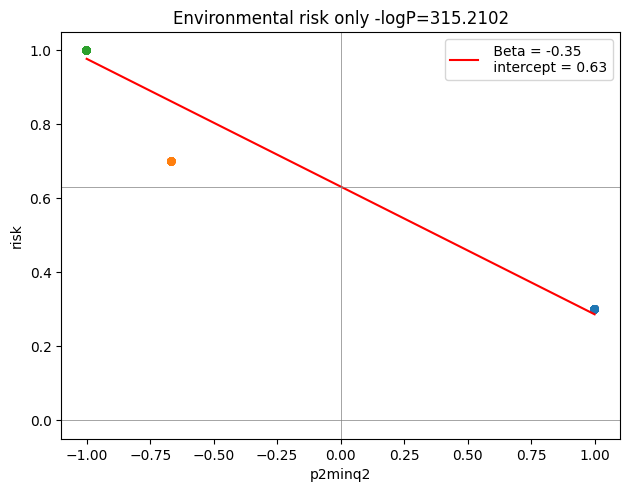

In [82]:
X = humans['p2minq2']
y = humans['risk']

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['p2minq2']
intercept = model.params['const']
p_value = model.pvalues['p2minq2']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_risk_p2minq2'] = model.predict(X)

# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='p2minq2', y='risk', data=humans, hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['p2minq2'], humans['predicted_risk_p2minq2'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

# Effect Causal SNP

In [108]:
def divi(arr, effectsize):
    return [(1 / (num + 0.001)) * effectsize for num in arr]

def multi(arr, effectsize):
    return [num * effectsize for num in arr]

In [109]:
effect = 10

In [110]:
humans['pheno'] = humans['snp']*effect

In [114]:
var_effect = np.var(humans['snp'])
total_variance = var_effect / 0.01
var_noise = total_variance - var_effect
sd_noise = np.sqrt(var_noise)
# Generate phenotype with noise
humans['pheno'] = humans['pheno'] + np.random.normal(0, sd_noise, n)

#std_dev = np.std(humans['pheno'])
#mean = np.mean(humans['pheno'])
#humans['pheno'] = (humans['pheno'] - mean) / std_dev

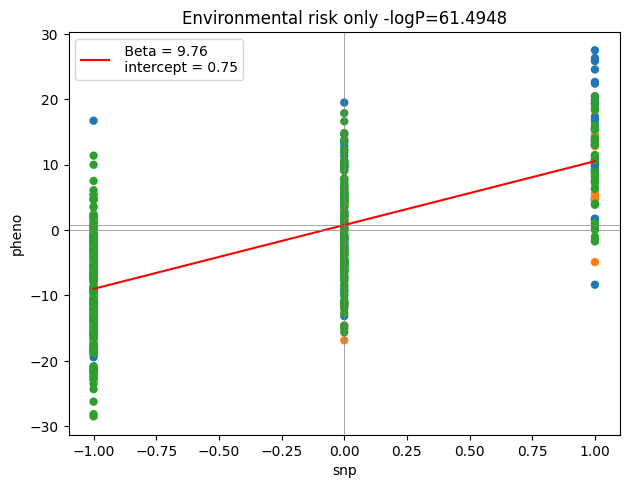

In [115]:
X = humans['snp']
y = humans['pheno']

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp']
intercept = model.params['const']
p_value = model.pvalues['snp']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_pheno'] = model.predict(X)

# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp', y='pheno', data=humans, hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp'], humans['predicted_pheno'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

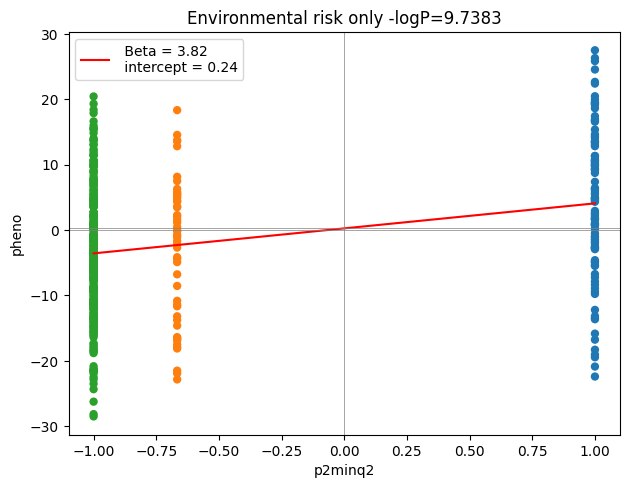

In [116]:
X = humans['p2minq2']
y = humans['pheno']

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['p2minq2']
intercept = model.params['const']
p_value = model.pvalues['p2minq2']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_pheno_p2minq2'] = model.predict(X)

# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='p2minq2', y='pheno', data=humans, hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['p2minq2'], humans['predicted_pheno_p2minq2'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

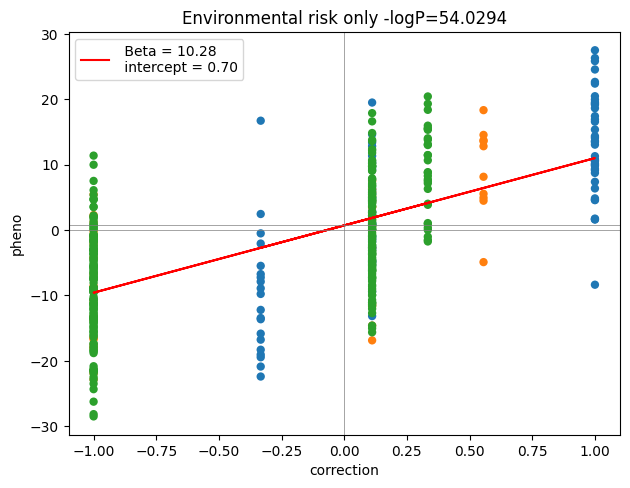

In [118]:
humans['correction'] = humans.apply(lambda row: row['minaf'] if row['snp'] == -1 else (row['hetaf'] if row['snp'] == 0 else row['majaf']), axis=1)
humans['correction'] = humans['correction']*humans['snp']
humans['correction'] = min_max_scaling(humans['correction'],-1,1)
X = humans['correction']
y = humans['pheno']

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['correction']
intercept = model.params['const']
p_value = model.pvalues['correction']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_pheno_correction'] = model.predict(X)

# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='correction', y='pheno', data=humans, hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['correction'], humans['predicted_pheno_correction'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

In [119]:
# Combination

In [121]:
humans['combined_pheno'] = humans['pheno']+humans['risk']

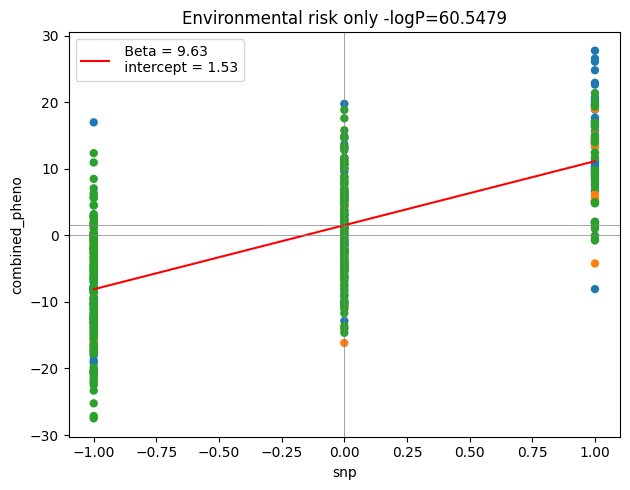

In [122]:
X = humans['snp']
y = humans['combined_pheno']

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp']
intercept = model.params['const']
p_value = model.pvalues['snp']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_pheno'] = model.predict(X)

# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp', y='combined_pheno', data=humans, hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp'], humans['predicted_pheno'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

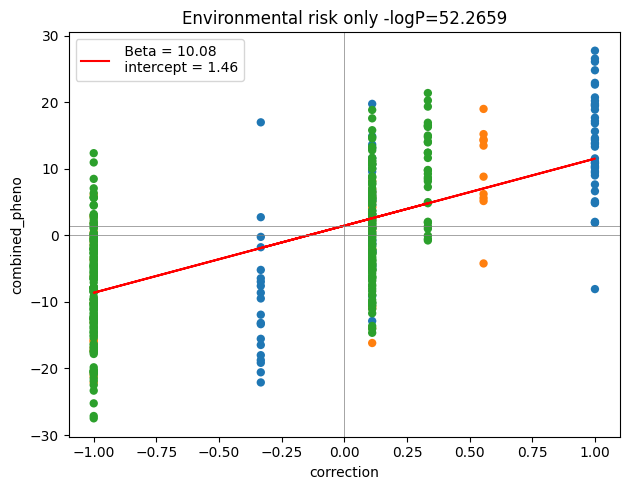

In [123]:
humans['correction'] = humans.apply(lambda row: row['minaf'] if row['snp'] == -1 else (row['hetaf'] if row['snp'] == 0 else row['majaf']), axis=1)
humans['correction'] = humans['correction']*humans['snp']
humans['correction'] = min_max_scaling(humans['correction'],-1,1)
X = humans['correction']
y = humans['combined_pheno']

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['correction']
intercept = model.params['const']
p_value = model.pvalues['correction']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_pheno_correction'] = model.predict(X)

# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='correction', y='combined_pheno', data=humans, hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['correction'], humans['predicted_pheno_correction'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

In [140]:
humans['snp_AF_05'] = humans['snp']

In [132]:
beta_mafs_ols = manhattan_linear(humans[['snp_AF_05']], humans[['combined_pheno']], humans[['correction']])    
beta_mafs_ols

,snp,coefs,AFs,Ps,-logPs
0,snp,9.659144,05,7.435066e-10,9.128715


In [146]:
beta_mafs_ols = manhattan_linear(humans[['snp_AF_05']], humans[['risk']], humans[['p2minq2']])    
beta_mafs_ols

,snp,coefs,AFs,Ps,-logPs
0,snp,9.055257e-16,05,1.0,8.032848e-14


In [145]:
beta_mafs_ols = manhattan_linear(humans[['snp_AF_05']], humans[['risk']])    
beta_mafs_ols

,snp,coefs,AFs,Ps,-logPs
0,snp,-0.127121,05,1.430830e-12,11.844412
